In [1]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as image
import pathlib
import glob
import imutils

In [2]:
MODEL = 'yolo\yolov3-face.cfg'
WEIGHT = 'yolo\yolov3-wider_16000.weights'

net = cv2.dnn.readNetFromDarknet(MODEL, WEIGHT)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
IMG_WIDTH, IMG_HEIGHT = 416, 416

In [3]:
frame = cv2.imread('sample\pic1.jpg')
frame.shape


(1365, 1365, 3)

In [4]:
blob = cv2.dnn.blobFromImage(frame, 1/255, (IMG_WIDTH, IMG_HEIGHT),[0, 0, 0], 1, crop=False)

In [5]:
net.setInput(blob)

In [6]:
output_layers = net.getUnconnectedOutLayersNames()

In [7]:
# Run 'prediction'
outs = net.forward(output_layers)



In [8]:
frame_height = frame.shape[0]
frame_width = frame.shape[1]

In [10]:
confidences = []
boxes = []

# Each frame produces 3 outs corresponding to 3 output layers
for out in outs:
# One out has multiple predictions for multiple captured objects.
    for detection in out:
        confidence = detection[-1]
        # Extract position data of face area (only area with high confidence)
        if confidence > 0.5:
            center_x = int(detection[0] * frame_width)
            center_y = int(detection[1] * frame_height)
            width = int(detection[2] * frame_width)
            height = int(detection[3] * frame_height)
            
            # Find the top left point of the bounding box 
            topleft_x = center_x - width/2
            topleft_y = center_y - height/2
            confidences.append(float(confidence))
            boxes.append([topleft_x, topleft_y, width, height])

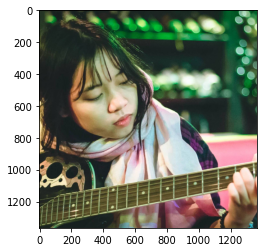

In [13]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

result = frame.copy()
final_boxes = []
for i in indices:
    i = i[0]
    box = boxes[i]
    final_boxes.append(box)

    # Extract position data
    left = box[0]
    top = box[1]
    width = box[2]
    height = box[3]

# Draw bouding box with the above measurements
    cv2.rectangle(result, (np.int64(left),np.int64(top)), (np.int64(left+width), np.int64(top+height)), (0,255,255),2)
    # Display text about confidence rate above each box
    text = f'{confidences[i]:.2f}'
    cv2.putText(result, text, (np.int64(left), np.int64(top)-2), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0,255,0),1)

# Display text about number of detected faces on topleft corner
total = f'number of detected faces: {len(final_boxes)}'
cv2.putText(result, total, (15, 15), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0,255,0),2,)
result2 = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
cv2.imshow('face detection', result)
plt.imshow(result2)